### Comprehensive List

In [ ]:
numbers = [1,2,3,4,5,6,7,8,9,10]
result = []
for item in numbers:
    result.append(item)
print(result)

In [ ]:
result = [item for item in numbers]
print(result)

In [ ]:
result = [item for item in numbers if item % 2 == 0]
print(result)

In [ ]:
result = [item if item % 2 == 0 else item + 1 for item in numbers]
print(result)

In [ ]:
numbers = [1,2,3,4,5,6,7,8,9,10]
characters = "ABCDEFG"
result = [str(item1)+item2 for item1 in numbers for item2 in characters]
print(result)

In [ ]:
numbers = [1,2,3,4,5,6,7,8,9,10]
characters = "ABCDEFG"
result = [item2 for item1 in numbers for item2 in characters[item1//2]]
print(result)

In [ ]:
numbers = [1,2,3,4,5,6,7,8,9,10]
characters = "ABCDEFG"
result = [str(numbers[i]) + "_" + item for i, item in enumerate(characters)]
print(result)

### Comprehensive Dictionary

In [ ]:
numbers = [1,2,3,4,5,6,7]
characters = "ABCDEFG"
result = dict(zip(numbers, characters))
print(result)

In [ ]:
result = { numbers[i]:item for i, item in enumerate(characters)}
print(result)

In [ ]:
numbers = [1,2,3,4,5,6,7]
characters = "ABCDEFG"
result = dict(zip(numbers, characters))
for key, value in result.items():
    print(str(key) + "_" + value)

In [ ]:
numbers = [1,2,3,4,5,6,7]
characters = "ABCDEFG"
result = dict(zip(numbers, characters))
for key in result:
    print(str(key) + "_" + result[key])

In [ ]:
numbers = [1,2,3,4,5,6,7]
characters = "ABCDEFG"
result = dict(zip(numbers, characters))
result = [str(key) + "_" + value for key, value in result.items()]
print(result)

In [ ]:
numbers = [1,2,3,4,5,6,7]
characters = "ABCDEFG"
result = dict(zip(numbers, characters))
result = [str(key) + "_" + result[key] for key in result]
print(result)

In [ ]:
print('\n'.join(result))

### Ex 1. Write a Python program to construct the following pattern, using a nested for loop. (1-2 lines of code)<br>
Input: <br>
n = 3 <br>
<br>
Output: <br>
x <br>
xx <br>
xxx <br>xx
xxx

### Ex 2. Write a Python program to count the number of even and odd numbers from a series of numbers. (1-2 lines of code) <br>

Input: <br>
Sample numbers : 1, 2, 3, 4, 5, 6, 7, 8, 9 <br><br>

Output: <br>
Number of even numbers : 5 <br>
Number of odd numbers : 4 <br>

# NumPy

<img src="https://numpy.org/images/logo.svg" alt="NumPy" style="width: 100px;"/><br>

The fundamental package for scientific computing with Python. Use for basic data representation and linear algebra operation. NumPy also provide several data formats and array format for python. The data manipulation and data preprocessing also can be done with NumPy. From Aj.Ple experience, Aj.Ple suggest to change data representation to NumPy for Data Engineering & Data Analytics work. <br>

P.S. Linear Algebra is about linear equation in form of vector and matrix !!

www.numpy.org

### 1. NumPy Array

To use external Library in PyThon, we will use the command called <i>import</i>.<br> In this example, we use external library called <i>NumPy</i> and give it a short name as <i>np</i>. 

In [ ]:
import numpy as np

In [ ]:
np.__version__

In [ ]:
#!pip install numpy==1.26.4

In [ ]:
L = [1,2,3,4,5]
V = np.array(L)
V

In [ ]:
L = [1,2,3,4,5]
V = np.array(L, dtype = float)
V

In [ ]:
V.shape

In [ ]:
V2 = V.reshape(5,1) 
V2

In [ ]:
V2.shape

In [ ]:
V3 = V.reshape(1,5) 
V3

In [ ]:
V3.shape

In [ ]:
V.reshape(-1,1)

In [ ]:
V

In [ ]:
V[0]

In [ ]:
V[2:5]

In [ ]:
V[:6]

In [ ]:
V[3:]

In [ ]:
V[-2]

In [ ]:
V[-5:]

In [ ]:
V[-5:-1]

In [ ]:
np.size(V)

In [ ]:
np.shape(V)

In [ ]:
L = [[1,2,3],
     [4,5,6],
     [7,8,9]]
a = np.array(L)
a

In [ ]:
np.shape(a)

In [ ]:
L = [ [1,2,3,4,5], [6,7,8,9,10] ]
a = np.array(L)
a

In [ ]:
np.size(a)

In [ ]:
L[0][0] # List

In [ ]:
a[0,0] # Array

In [ ]:
a

In [ ]:
a[0, 4]

In [ ]:
a[1,:] * 10

In [ ]:
a[:,-1]

In [ ]:
a[:,-1] = 0
a

In [ ]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9],
              [10,11,12]])
np.size(a,axis=0)

In [ ]:
np.size(a,axis=1)

In [ ]:
np.ndim(a)

### Data is Matrix.
So, Matrix management == Data Management <br>
rows    = samples <br>
columns = attributes, features

In [ ]:
np_mix_matrix = np.array([['one',2],
                          ['three',4],
                          ['five',6]])
np_mix_matrix

In [ ]:
np.array(np_mix_matrix[:,1], dtype = int)

### 2. Special Type of Matrix

In [ ]:
a = np.zeros( (2,2) )
a

In [ ]:
b = np.ones((2,2))
b

In [ ]:
c = np.full((2,2),8)
c

In [ ]:
d = np.eye(2)
d

In [ ]:
c*d # Dot Product

In [ ]:
2*np.ones((2,2))

In [ ]:
np.sqrt(np.full((2,2),4))

In [ ]:
np.empty([5,5])

### 3. Random

In [ ]:
import numpy as np
rng = np.random.RandomState(0)  # 0 is SEED
rng.rand()

In [ ]:
rng.rand()

In [ ]:
[i for i in range(0,5)]

In [ ]:
[rng.randint(1,5) for i in range(0,5)]

In [ ]:
rng.rand(5,5)

In [ ]:
import numpy as np
np.round(rng.rand(5,5)*1000)

In [ ]:
rng.randint(0,2, (5,5))

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10]
rng.choice(a,5)

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10]
rng.choice(a,5, replace = False)

In [ ]:
rng.choice(10,3)

In [ ]:
np_matrix = rng.rand(1000,5)
idx_choose = rng.choice(1000,3)
np_matrix_choose = np_matrix[idx_choose,:]
np_matrix_choose

In [ ]:
np_matrix = rng.rand(1000,5)
np_matrix

In [ ]:
np_choice = rng.choice(1000, 3)
np_choice

In [ ]:
np_matrix[np_choice, :]

In [ ]:
np_matrix = rng.rand(1000,5)
np_matrix

In [ ]:
np_matrix = rng.rand(5,5)
np_matrix

In [ ]:
group = rng.randint(0,3,5)
group

In [ ]:
A = np_matrix[group==0 ,:]
B = np_matrix[group==1, :]
C = np_matrix[group==2, :]

In [ ]:
A

In [ ]:
B

In [ ]:
C

In [ ]:
data = [ ['001', 'AAA'], 
         ['002', 'BBB'],
         ['003', 'CCC'],
         ['004', 'DDD'],
         ['005', 'EEE'], ]
data

In [ ]:
data = np.array(data)

In [ ]:
choose = rng.choice(5, 2)
choose

In [ ]:
data[choose, :]

In [ ]:
data

In [ ]:
group = rng.randint(0,2,5)
group

In [ ]:
data[group==0, :]

In [ ]:
data[group==1, :]

In [ ]:
np_matrix_choose = np_matrix[rng.choice(5,3),:]
np_matrix_choose

In [ ]:
#Ex 3. Randomly create a matrix of size (10, 5) then randomly assign values of 0 and 1 to the last column of this matrix.
data = rng.rand(10,5)
#
#

In [ ]:
A = rng.randint(0,6, (4,4))
A

In [ ]:
A = np.delete(A, 1, axis = 0)
A

In [ ]:
A = np.delete(A, 1, axis = 1)
A

In [ ]:
A = np.delete(A, [1,2] , axis = 1)
A

In [ ]:
np_matrix = rng.randint(0,2, (4,4))
np_matrix

In [ ]:
rows, cols = np.where(np_matrix==1)

In [ ]:
list(zip(rows, cols))

In [ ]:
cols

In [ ]:
rows, cols = np.where( (np_matrix == 1) | (np_matrix == 0) )
[[row, cols[i]] for i, row in enumerate(rows) ]

In [ ]:
rows

In [ ]:
cols

In [ ]:
np_matrix = rng.randint(10,size = (5,5))
np_matrix

In [ ]:
result = (np_matrix == 2)
result

In [ ]:
np_matrix[result] = 99
np_matrix

In [ ]:
np_matrix[ np_matrix==0 ] = 88
np_matrix

In [ ]:
# Ex 4. 
# 1. Randomly create a data matrix X of 10 samples with 5 features (10 rows  5 columns). 
# 2. Then, randomly create a label vector for 10 samples as (0 and 1) # [0,1,0,0,1,1,1,0,0,0]
# 3. Finally, seperate data matrix into A & B
# 4. A contain rows of X corresponding with label == 0
# 5. B contain rows of X corresponding with label == 1

In [ ]:
# 1. Data

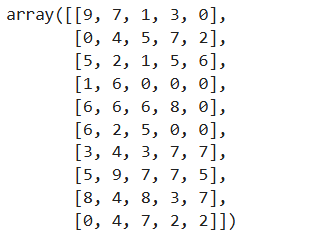

In [ ]:
# 2. Label

In [ ]:
# 3. Group A

In [ ]:
# 4. Group B

A

In [ ]:
#

B

In [ ]:
#

### 4. Important Function

In [ ]:
data = np.random.randint(5,size=(5,5)) + 1
data

In [ ]:
np.max(data)

In [ ]:
np.max(data,axis=0)

In [ ]:
np.max(data,axis=1)

In [ ]:
np.sum(data)

In [ ]:
np.sum(data, axis=0)

In [ ]:
np.sum(data, axis=1)

In [ ]:
np.average(data)

In [ ]:
data[0,:]

In [ ]:
np.argmax(data[0,:])

In [ ]:
np.argmin(data[0,:])

In [ ]:
np.sort(data[0,:])

In [ ]:
np.argsort(data[0,:])

In [ ]:
A = data[0,:]
A

In [ ]:
i = np.argsort(A)
i

In [ ]:
A[i]

In [ ]:
# Ex.5 How to sort in decreasing order using np.sort

In [ ]:
np.arange(0,10,2)

In [ ]:
np.linspace(0,100,5)

In [ ]:
data = np.round(rng.random((5,5))*3)
data

In [ ]:
data.shape

In [ ]:
data.reshape(1,25)

In [ ]:
a = [[1,2],
     [3,4]]
a

In [ ]:
b = np.zeros((2,2))
b

In [ ]:
c = np.vstack( (a,b) )
c

In [ ]:
c = np.hstack( (a,b) )
c

# Association Rules

In data science, association rules are used to find correlations and co-occurrences between data sets. They are ideally used to explain patterns in data from seemingly independent information repositories, such as relational databases and transactional databases. The act of using association rules is sometimes referred to as "association rule mining" or "mining associations."

### Medicine
Doctors can use association rules to help diagnose patients. There are many variables to consider when making a diagnosis, as many diseases share symptoms. By using association rules and machine learning-fueled data analysis, doctors can determine the conditional probability of a given illness by comparing symptom relationships in the data from past cases. As new diagnoses get made, the machine learning model can adapt the rules to reflect the updated data.

### Retail
Retailers can collect data about purchasing patterns, recording purchase data as item barcodes are scanned by point-of-sale systems. Machine learning models can look for co-occurrence in this data to determine which products are most likely to be purchased together. The retailer can then adjust marketing and sales strategy to take advantage of this information.

<img src=https://bigdata.go.th/wp-content/uploads/2021/04/table_baskets-1-1024x518.png>

In [ ]:
import numpy as np
data = np.loadtxt("market.csv",delimiter=";", dtype=str)
data

In [ ]:
data.shape

In [ ]:
data[0,:]

In [ ]:
data[1,:]

In [ ]:
data[-1,:]

In [ ]:
products = data[0, :]
products

In [ ]:
baskets = np.array(data[1:], dtype=int)
baskets

In [ ]:
products.shape

In [ ]:
baskets.shape

In [ ]:
products[baskets[0,:] == 1]

In [ ]:
products[baskets[-1,:] == 1]

### Itemset =  กลุ่มของสินค้า เช่น  {น้ำเปล่า}  {ไข่,เนย}
### Association Rule = Itemset LHS => Itemset RHS

#### เช่น  ขนมปัง => เนย, ไข่

### Support
มีการซื้อขายที่มี itemset อยู่ด้วยเป็นสัดส่วนเท่าไหร่ ในการซื้อขายทั้งหมด <br>
<b>จน. ตะร้าที่มี Itemset / จน.ตะกร้าทั้งหมด</b>

### Confidence
Confidence เป็นตัววัดประสิทธิภาพสำหรับ association rule โดยเป็นตัวเลขที่แสดงความน่าจะเป็นที่กลุ่มของสินค้า RHS จะถูกหยิบเข้าตะกร้าด้วย หลังจากที่กลุ่มของสินค้า LHS ถูกหยิบเข้าตะกร้าไปแล้ว <br>


Confidence(LHS => RHS)	=	Support(LHS, RHS)/Support(LHS) <br>

### Lift
ความน่าจะเป็นที่ลูกค้าจะหยิบกลุ่มสินค้า RHS หลังจากที่ลูกค้าหยิบกลุ่มสินค้า LHS ลงตะกร้าไปแล้ว เพิ่มหรือลดเป็นจำนวนกี่เท่าของความน่าจะเป็นที่ลูกค้าจะซื้อกลุ่มสินค้า RHS โดยปกติ <br><br>
Lift(LHS=>RHS) = Confidence(LHS=>RHS) / Support(RHS) <br>

ค่ามากกว่า 1 เพิ่มความน่าจะเป็นในการหยิบเพิ่ม

### Calcualte Association Rule at Support 0.4

In [ ]:
number_of_basket = len(baskets)
number_of_basket

In [ ]:
number_of_buying = np.sum(baskets, axis=0)
number_of_buying_each_product = dict(zip(products,number_of_buying))
number_of_buying_each_product

In [ ]:
products_support = {key:value/number_of_basket for key, value in number_of_buying_each_product.items()}
products_support

In [ ]:
products_support_40 = {key:value for key, value in products_support.items() if value > 0.4}
products_support_40

### Calculate confident of which Bread => Bacon
#### Support(Bread, Bacon)/Support(Bread)

In [ ]:
# Support(Bread)
products_support['Bread']

### Calculate Support(Bread, Bacon)

In [ ]:
baskets[:,products=='Bread']

In [ ]:
baskets[:,products=='Bacon'] 

In [ ]:
# Number of customer buying both Bread & Bacon
freq = np.sum(baskets[:,products=='Bread'] * baskets[:,products=='Bacon'])
freq

In [ ]:
support_freq = freq / number_of_basket
support_freq

#### Bread -> Bacon

In [ ]:
# Confident
confident = support_freq / products_support['Bread']
confident

In [ ]:
# Lift
lift = confident /  products_support['Bacon']
lift

In [ ]:
import numpy as np

# Load local market data
data = np.loadtxt('market.csv', delimiter=';', dtype=str)
products = data[0, :]
baskets = np.array(data[1:], dtype=int)

# Basic stats
number_of_basket = len(baskets)
number_of_buying = np.sum(baskets, axis=0)
products_support = {k: v / number_of_basket for k, v in zip(products, number_of_buying)}

# Bread -> Bacon rule
idx_bread = products == 'Bread'
idx_bacon = products == 'Bacon'
freq = np.sum(baskets[:, idx_bread] * baskets[:, idx_bacon])
support_freq = freq / number_of_basket
confidence = support_freq / products_support['Bread']
lift = confidence / products_support['Bacon']

lines = []
lines.append(f'Jami savatchalar: {number_of_basket}')
lines.append('')
lines.append("Mahsulotlar support (ko'pdan kamga):")
for name, sup in sorted(products_support.items(), key=lambda x: x[1], reverse=True):
    lines.append(f" - {name:12s} {sup:.2%}")
lines.append('')
lines.append('Qoida: Bread => Bacon')
lines.append(f'  Support   : {support_freq:.2%}')
lines.append(f'  Confidence: {confidence:.2%}')
lines.append(f'  Lift      : {lift:.3f}')

print('\n'.join(lines))


In [ ]:
# Qoida tekshirish uchun yordamchi funksiyalar
import numpy as np


def show_rule(lhs, rhs):
    """lhs va rhs ro'yxatidagi mahsulotlar uchun support/confidence/lift ni chiqarish."""
    lhs_mask = np.isin(products, lhs)
    rhs_mask = np.isin(products, rhs)
    if lhs_mask.sum() == 0:
        print(f"LHS topilmadi: {lhs}")
        return
    if rhs_mask.sum() == 0:
        print(f"RHS topilmadi: {rhs}")
        return

    lhs_hits = np.all(baskets[:, lhs_mask] == 1, axis=1)
    rhs_hits = np.all(baskets[:, rhs_mask] == 1, axis=1)
    both_hits = lhs_hits & rhs_hits

    support = both_hits.mean()
    lhs_support = lhs_hits.mean()
    rhs_support = rhs_hits.mean()
    confidence = support / lhs_support if lhs_support else 0.0
    lift = confidence / rhs_support if rhs_support else 0.0

    lhs_str = ', '.join(lhs)
    rhs_str = ', '.join(rhs)
    print(f"Qoida: {lhs_str} => {rhs_str}")
    print(f"  Support   : {support:.2%}")
    print(f"  Confidence: {confidence:.2%}")
    print(f"  Lift      : {lift:.3f}\n")


# Namuna qo'llanish
show_rule(['Bread'], ['Bacon'])
show_rule(['Milk', 'Butter'], ['Bread'])


In [ ]:
# Interaktiv tanlash (ipywidgets)
try:
    import ipywidgets as widgets
    from IPython.display import display
except ImportError:
    print("ipywidgets topilmadi. O'rnatish: pip install ipywidgets")
else:
    lhs_select = widgets.SelectMultiple(options=list(products), description='LHS', rows=8)
    rhs_select = widgets.SelectMultiple(options=list(products), description='RHS', rows=8)
    run_button = widgets.Button(description='Hisobla', button_style='success')
    out = widgets.Output()

    def _on_click(_):
        out.clear_output()
        lhs = list(lhs_select.value)
        rhs = list(rhs_select.value)
        with out:
            if not lhs or not rhs:
                print("Iltimos, LHS va RHS tanlang.")
                return
            show_rule(lhs, rhs)

    run_button.on_click(_on_click)
    display(widgets.VBox([
        widgets.HBox([lhs_select, rhs_select]),
        run_button,
        out
    ]))


In [ ]:
# Ko'p elementli qoida (2-3ta mahsulot) va menejer uchun xulosa
import itertools as it

# Parametrlar
min_support = 0.10  # kamida 10% savatchada uchrashi
min_conf = 0.40     # kamida 40% ishonchlilik
max_lhs = 2         # LHS uzunligi 1 yoki 2
max_rhs = 2         # RHS uzunligi 1 yoki 2

# Precompute masklar
a_masks = {p: baskets[:, i].astype(bool) for i, p in enumerate(products)}

rules = []
for lhs_len in range(1, max_lhs + 1):
    for rhs_len in range(1, max_rhs + 1):
        for lhs in it.combinations(products, lhs_len):
            lhs_mask = a_masks[lhs[0]].copy()
            for p in lhs[1:]:
                lhs_mask &= a_masks[p]
            lhs_sup = lhs_mask.mean()
            if lhs_sup < min_support:
                continue

            remaining = [p for p in products if p not in lhs]
            for rhs in it.combinations(remaining, rhs_len):
                rhs_mask = a_masks[rhs[0]].copy()
                for p in rhs[1:]:
                    rhs_mask &= a_masks[p]
                rhs_sup = rhs_mask.mean()
                if rhs_sup == 0:
                    continue

                both = lhs_mask & rhs_mask
                sup = both.mean()
                if sup < min_support:
                    continue

                conf = sup / lhs_sup if lhs_sup else 0
                if conf < min_conf:
                    continue

                lift = conf / rhs_sup if rhs_sup else 0
                rules.append({
                    'lhs': lhs,
                    'rhs': rhs,
                    'support': sup,
                    'confidence': conf,
                    'lift': lift,
                    'lhs_sup': lhs_sup,
                    'rhs_sup': rhs_sup,
                })

# Eng kuchli 12 qoida lift bo'yicha
rules_sorted = sorted(rules, key=lambda r: r['lift'], reverse=True)

print(f"Menejer uchun xulosa: support>={min_support:.0%}, confidence>={min_conf:.0%}, LHS<= {max_lhs}, RHS<= {max_rhs}")
print(f"Topilgan qoidalar: {len(rules_sorted)} ta")
print("Eng kuchli 12 qoida (lift bo'yicha):")
for r in rules_sorted[:12]:
    lhs = ', '.join(r['lhs'])
    rhs = ', '.join(r['rhs'])
    print(f"{lhs} => {rhs} | support={r['support']:.2%}, conf={r['confidence']:.2%}, lift={r['lift']:.3f}")


In [ ]:
# Do'kon joylashuvi uchun tavsiyalar (ipywidgets)
try:
    import ipywidgets as widgets
    from IPython.display import display
except ImportError:
    print("ipywidgets topilmadi. O'rnatish: pip install ipywidgets")
else:
    # Pairwise lift hisoblash (A => B)
    lifts = []
    for i, a in enumerate(products):
        lhs = baskets[:, i].astype(bool)
        lhs_sup = lhs.mean()
        for j, b in enumerate(products):
            if i == j:
                continue
            rhs = baskets[:, j].astype(bool)
            rhs_sup = rhs.mean()
            if rhs_sup == 0:
                continue
            sup = (lhs & rhs).mean()
            if sup == 0:
                continue
            conf = sup / lhs_sup if lhs_sup else 0
            lift = conf / rhs_sup if rhs_sup else 0
            lifts.append((lift, conf, sup, a, b))

    def render(min_sup, min_lift, top_n):
        out_lines = []
        filtered = [r for r in lifts if r[2] >= min_sup and r[0] >= min_lift]
        filtered.sort(reverse=True)  # sort by lift desc
        out_lines.append(f"Top {top_n} juftlik (lift bo'yicha):")
        for lift, conf, sup, a, b in filtered[:top_n]:
            out_lines.append(f"{a} -> {b} | support={sup:.2%}, conf={conf:.2%}, lift={lift:.3f}")
        return '\n'.join(out_lines)

    min_sup_slider = widgets.FloatSlider(value=0.10, min=0.0, max=0.5, step=0.01, description='Min support')
    min_lift_slider = widgets.FloatSlider(value=1.1, min=0.8, max=2.0, step=0.05, description='Min lift')
    top_n_slider = widgets.IntSlider(value=10, min=3, max=30, step=1, description='Top N')
    out = widgets.Output()

    def _on_change(change=None):
        with out:
            out.clear_output()
            txt = render(min_sup_slider.value, min_lift_slider.value, top_n_slider.value)
            print(txt)

    for w in [min_sup_slider, min_lift_slider, top_n_slider]:
        w.observe(_on_change, names='value')

    _on_change()
    display(widgets.VBox([widgets.HBox([min_sup_slider, min_lift_slider, top_n_slider]), out]))
